In [6]:
from sympy import symbols, exp, sqrt, Function, diff, simplify, lambdify
from sympy.functions.combinatorial.factorials import factorial
from sympy.functions.special.polynomials import hermite
from sympy import integrate
from sympy import plot
import matplotlib.cm as cm
from matplotlib.cm import ScalarMappable
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, FloatSlider

def Particle_mode(x, t, n, k, D):
    H_n = hermite(n, sqrt(k / (2 * D)) * x)
    P = exp(-k * x**2 / (2 * D)) * H_n * exp(-n * k * t)
    return P

def solves_Focker_plack(equation):
    # Calculate the derivatives for the LHS and RHS of the differential equation
    LHS = diff(equation, t)
    RHS = D * diff(equation, x, x) - diff(-k * x * equation, x)

    # Compare the LHS and RHS of the differential equation
    difference=simplify(LHS-RHS)
    return difference==0

x = symbols('x', real=True)
t, tau= symbols('t, tau', real=True,positive=True)
k, D = symbols('k D', real=True,positive=True, nonzero=True)


In [7]:
def P_transition(x,t,x_0,k,D,n_max):
    equation=0
    for n in range(n_max):
        c_n= hermite(n, sqrt(k / (2 * D)) * x_0)
        equation+=c_n*Particle_mode(x, t, n, k, D)
    return sqrt(k / (2 * D))*equation*exp(k * x_0**2 / (2 * D))


In [8]:
solution=P_transition(x,t,4,k,D,3)

In [9]:
solves_Focker_plack(solution)

True

In [10]:


x, t = symbols('x t')

x_0 = 1

n_values = [10,30,60,100]
f_lambdas = [lambdify((x, t), P_transition(x, t, x_0, 1, 0.5, n), "numpy") for n in n_values]

def plot_func(t_val):
    x_vals = np.linspace(-10, 10, 400)

    fig, axs = plt.subplots(1, len(n_values), figsize=(18, 6))
    
    for i in range(len(n_values)):
        y_vals = f_lambdas[i](x_vals, t_val)
        axs[i].plot(x_vals, y_vals)
        axs[i].grid(True)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('f(x, t)')
        axs[i].set_title(f'Degree:= {n_values[i]}')

    plt.tight_layout()
    plt.show()

interact(plot_func, t_val=FloatSlider(value=5, min=0, max=10, step=0.01));


interactive(children=(FloatSlider(value=5.0, description='t_val', max=10.0, step=0.01), Output()), _dom_classe…

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import symbols, diff, lambdify

# Assuming x, t, n, k, D are defined in your Particle_mode function

N = 130  # number of iterations
k = 1
D = 1
x_range = np.linspace(-20, 20, 1000)  # define the range of x you're interested in

global_maxima = []

x_0_values=np.linspace(0,5,50)
weighted_maxima=np.zeros((N,len(x_0_values)))

for n in range(N):
    # Convert Particle_mode to a numpy function
    particle_mode_np = lambdify(x, Particle_mode(x, 0, n, k, D), "numpy")

    # Compute function values and find the maximum
    y_values = particle_mode_np(x_range)
    max_value = np.max(y_values)

    for i, x_0 in enumerate(x_0_values):
        weighted_maxima[n,i]=max_value*particle_mode_np(x_0)
    

    global_maxima.append(max_value)

C:\Users\jschulz\AppData\Local\Temp\ipykernel_14320\1553217480.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap1 = cm.get_cmap('cool')  # blue to red color map
C:\Users\jschulz\AppData\Local\Temp\ipykernel_14320\1553217480.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap2 = cm.get_cmap('YlOrRd')  # yellow to red color map
C:\Users\jschulz\AppData\Local\Temp\ipykernel_14320\1553217480.py:21: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from 

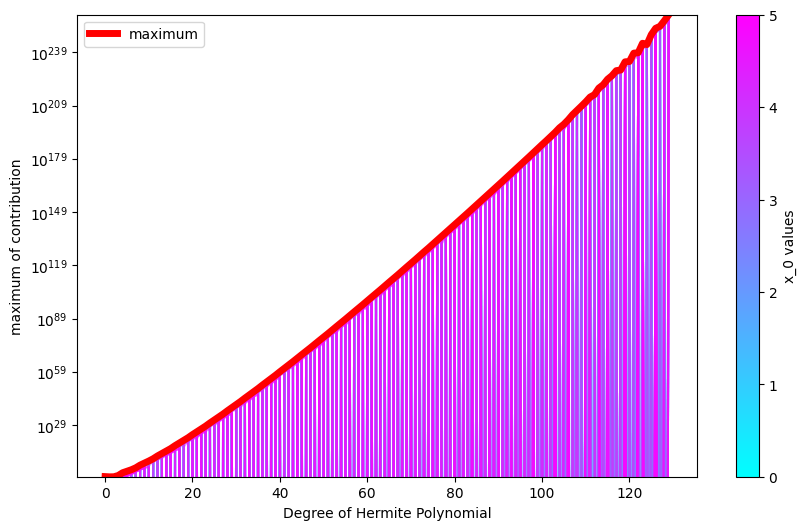

In [12]:
plt.figure(figsize=(10, 6))

# Define color maps
cmap1 = cm.get_cmap('cool')  # blue to red color map
cmap2 = cm.get_cmap('YlOrRd')  # yellow to red color map

n_values = np.array(list(range(N)))
t_values = [4, 5, 6]

# Plot the weighted_maxima
norm1 = plt.Normalize(min(x_0_values), max(x_0_values))
sm1 = ScalarMappable(norm=norm1, cmap=cmap1)

for i, weights in enumerate(weighted_maxima.T):
    color = cmap1(i / len(weighted_maxima.T))  # compute color
    plt.plot(n_values, weights, color=color, alpha=0.5)


weighted_maxima_max=np.max(weighted_maxima, axis=1)
plt.plot(n_values,weighted_maxima_max,c='r', lw=5, label="maximum" )
plt.colorbar(sm1, label='x_0 values')
plt.legend()

plt.xlabel('Degree of Hermite Polynomial')
plt.ylabel('maximum of contribution')


plt.ylim(float(np.min(global_maxima)), float(np.max(global_maxima)) * 1.1)
plt.yscale("log")
plt.ylim((0, np.max(weighted_maxima)))
plt.show()


In [13]:
t_convergence_list=[]
for n, max_weight in enumerate(weighted_maxima_max):
    t_convergence_list.append(np.log(max_weight)/n)


C:\Users\jschulz\AppData\Local\Temp\ipykernel_14320\2658970300.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  t_convergence_list.append(np.log(max_weight)/n)


Text(0, 0.5, 'Convergence time')

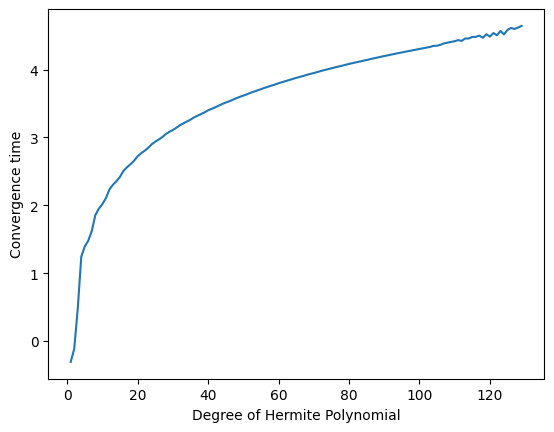

In [14]:
plt.plot(n_values,t_convergence_list )
plt.xlabel('Degree of Hermite Polynomial')
plt.ylabel('Convergence time')

In [15]:
x, t = symbols('x t')

x_0 = 1

n_values = [10,30,60,100]
f_lambdas = [lambdify((x, t), P_transition(x, t, x_0, 1, 0.5, n), "numpy") for n in n_values]

def plot_func(t_val):
    x_vals = np.linspace(-3, 3, 400)

    fig, axs = plt.subplots(1, len(n_values), figsize=(18, 6))
    
    for i, n in enumerate(n_values):
        t_conv=t_convergence_list[n]
        
        y_vals = f_lambdas[i](x_vals, t_val+t_conv)
        axs[i].plot(x_vals, y_vals)
        axs[i].grid(True)
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('f(x, t)')
        axs[i].set_title(f'Degree:= {n}')

    plt.tight_layout()
    plt.show()

interact(plot_func, t_val=FloatSlider(value=5, min=-1, max=1, step=0.01));

interactive(children=(FloatSlider(value=1.0, description='t_val', max=1.0, min=-1.0, step=0.01), Output()), _d…

C:\Users\jschulz\AppData\Local\Temp\ipykernel_13772\446220187.py:13: RuntimeWarning: overflow encountered in exp
  plt.plot(n_values, np.exp(n_values * k * t), label=f'exp(n * k * t) for t={t}')


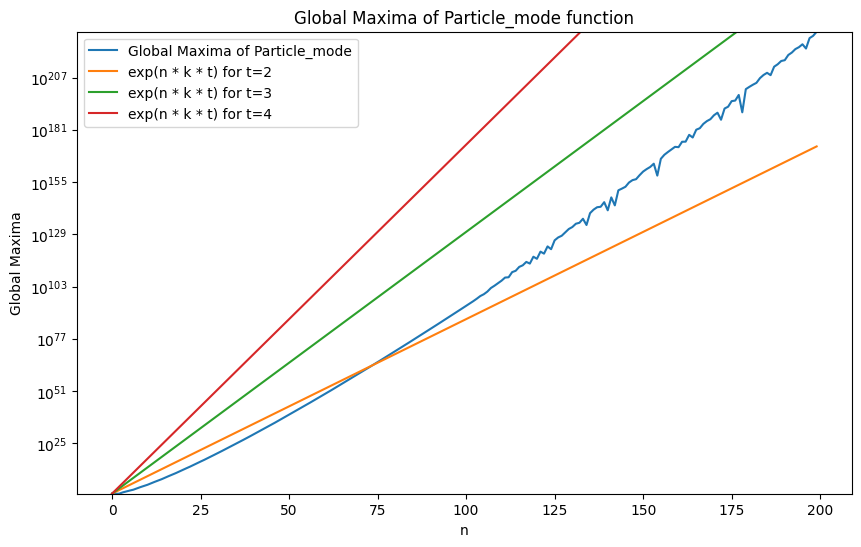

In [ ]:
# Plot the global maxima
plt.figure(figsize=(10, 6))
plt.plot(range(N), global_maxima, label='Global Maxima of Particle_mode')
plt.xlabel('n')
plt.ylabel('Global Maxima')
plt.title('Global Maxima of Particle_mode function')

# Plot the exponential function for t = [0.1, 1, 5]
t_values = [2, 3, 4]
n_values = np.arange(N)

for t in t_values:
    plt.plot(n_values, np.exp(n_values * k * t), label=f'exp(n * k * t) for t={t}')
plt.legend()
plt.ylim(float(np.min(global_maxima)), float(np.max(global_maxima)) * 1.1)
plt.yscale("log")


In [16]:
import sympy as sp



def gaussian(x, mu, sigma):
    return 1 / (sp.sqrt( 2*sp.pi * sigma**2)) * sp.exp(-((x - mu) / (sp.sqrt(2)*sigma))**2)

def project_gaussian_weighted(x,x_0,sigma,n):
    gauss=gaussian(x,x_0,sigma)
    project_gauss=project_onto_hermite_basis(x,gauss,n)
    project_gauss_weighted=project_gauss#*sp.exp(-x**2+x_0**2)
    return project_gauss_weighted

def scalar_product(f,g):
    x = sp.Symbol('x')
    w = sp.exp(-x**2)
    return sp.integrate(f *g * w, (x, -sp.oo, sp.oo))
    
def hermite_basis(n):
    return sp.hermite(n, x)/sqrt(sqrt(sp.pi)*2**n*sp.factorial(n))
def project_onto_hermite_basis(x,f, n):
    projection = 0
    for i in range(n):
        basis_vecor=hermite_basis(i)
        c_i = scalar_product(basis_vecor,f)
        projection += c_i * basis_vecor
        projection=simplify(projection)

    return projection


def project_delta(x_0, n):
    x = sp.Symbol('x')
    w = sp.exp(-x**2)
    projection = 0
    for i in range(n):
        basis_vecor=hermite_basis(i)
        c_i = basis_vecor.subs({x:x_0})
        projection += c_i * basis_vecor 

    return projection*w*sp.exp(x_0**2)

In [17]:
x_0=10
#sigma=1
n=20

x = sp.Symbol('x')
#project_gauss_weighted=project_gaussian_weighted(x,x_0,sigma,n)
approx_delta=project_delta(x_0,n)

In [18]:
approx_delta

(20*x/sqrt(pi) + 199*(4*x**2 - 2)/(4*sqrt(pi)) + 985*(8*x**3 - 12*x)/(6*sqrt(pi)) + 38803*(16*x**4 - 48*x**2 + 12)/(96*sqrt(pi)) + 38015*(32*x**5 - 160*x**3 + 120*x)/(48*sqrt(pi)) + 1481797*(64*x**6 - 480*x**4 + 720*x**2 - 120)/(1152*sqrt(pi)) + 7180895*(128*x**7 - 1344*x**5 + 3360*x**3 - 1680*x)/(4032*sqrt(pi)) + 276863221*(256*x**8 - 3584*x**6 + 13440*x**4 - 13440*x**2 + 1680)/(129024*sqrt(pi)) + 1326868945*(512*x**9 - 9216*x**7 + 48384*x**5 - 80640*x**3 + 30240*x)/(580608*sqrt(pi)) + 50582988811*(1024*x**10 - 23040*x**8 + 161280*x**6 - 403200*x**4 + 302400*x**2 - 30240)/(23224320*sqrt(pi)) + 47929250921*(2048*x**11 - 56320*x**9 + 506880*x**7 - 1774080*x**5 + 2217600*x**3 - 665280*x)/(25546752*sqrt(pi)) + 9029437307279*(4096*x**12 - 135168*x**10 + 1520640*x**8 - 7096320*x**6 + 13305600*x**4 - 7983360*x**2 + 665280)/(6131220480*sqrt(pi)) + 8454286296227*(8192*x**13 - 319488*x**11 + 4392960*x**9 - 26357760*x**7 + 69189120*x**5 - 69189120*x**3 + 17297280*x)/(7970586624*sqrt(pi)) + 15734

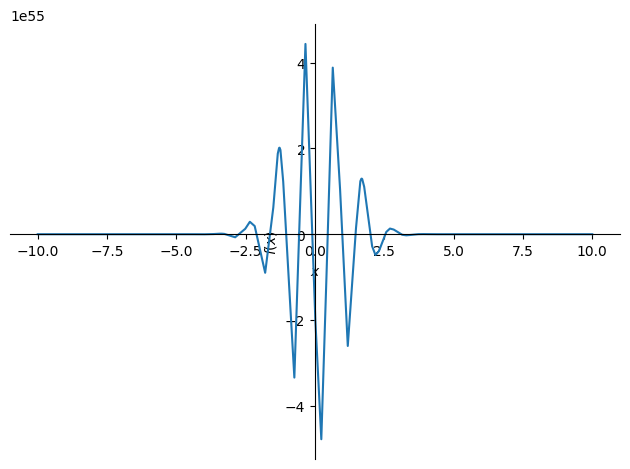

In [19]:
plot(approx_delta)
#plot(gaussian(x,x_0,0.1))

In [21]:
sp.integrate(project_gauss_weighted, (x, -sp.oo, sp.oo))

164.699115267308*sqrt(2)

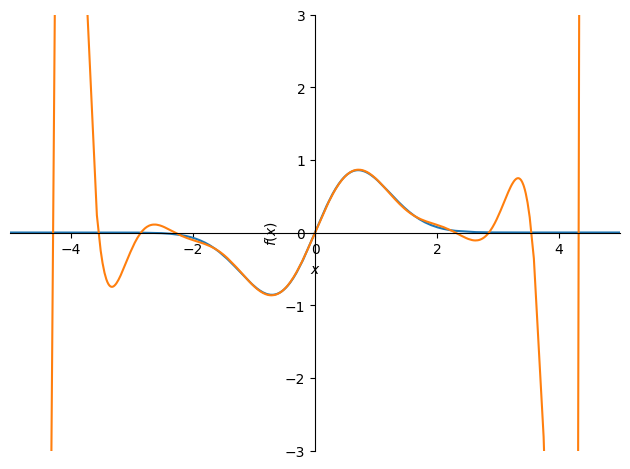

In [32]:
 x = sp.Symbol('x')
f_example=2*x*sp.exp(-x**2)
projection=project_onto_hermite_basis(x,f_example,15)
plot(f_example,projection,ylim=[-3,3],xlim=[-5,5] )

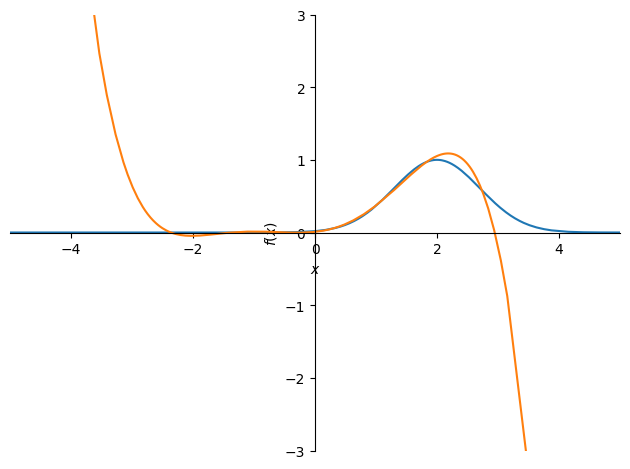

In [40]:
x = sp.Symbol('x')
f_example=sp.exp(-(x-2)**2)
projection=project_onto_hermite_basis(x,f_example,6)
plot(f_example,projection,ylim=[-3,3],xlim=[-5,5] )

In [117]:
x_0=2
n=200

delta_projection= project_delta(x_0, n)

<string>:1: RuntimeWarning: overflow encountered in multiply


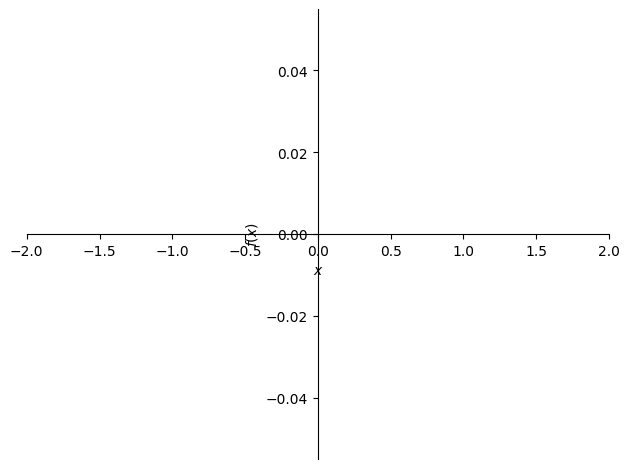

In [125]:
plot(simp_repr, xlim=[-2,2])

In [137]:
float(simp_repr.subs({x:10}))

1.5333221954291256e-21

In [122]:
simp_repr=sp.simplify(delta_projection)

In [123]:
simp_repr

(-2562778860984512866955598776002641543224485894263753937844716525904879130435133570287636077909258025302410851360059300467898250933321610785148907825673140442790124618689474230323019118558324288683544470826294030893056*x**199 + 15357815877698858521352008298195646734387069706787331999452790197915319605059280622947244216776616752665280866260425277935896310584062571376640604430192653655416663792301688985385647283892348687116326360948624326656000*x**198 + 25530365298551300743250911837822674648552408787337926345553835013149377987039697585607873463630670585264318532765110890211459389407718152454984914074308132713072573283544871969684811524223111369775500137443522856039219200*x**197 - 150710741046425892369968385551758909903040609174922977498980800095118123544259615073362800600987014508083508290212625698402691270230241108513847078864583009269944945231779375222765495176252904814242882163386196920270585856*x**196 - 12463133834497297596477460605544756888835511285296700366633940878193834472826858

In [47]:
import sympy as sp

x = sp.Symbol('x')

def hermite(n):
    if n%2==0:
        return sp.simplify(sp.hermite(n, x/sp.sqrt(2))*2**(-n/2))
    return sp.simplify(sp.hermite(n, x/sp.sqrt(2))*2**(-(n-1)/2)/sqrt(2))

# Example usage
n = 4
result = hermite(n)
result


1.0*x**4 - 6.0*x**2 + 3.0

In [48]:
hermite(3)

x*(1.0*x**2 - 3.0)

In [39]:
sp.hermite(3, x/sp.sqrt(2))

2*sqrt(2)*x**3 - 6*sqrt(2)*x

In [46]:
8%2

0

In [45]:
1/(2*(2**0.5))

0.35355339059327373